In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from tensorflow.keras import datasets,layers,models

In [11]:
(x_train,y_train) ,(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [15]:
x_train=x_train/255
x_test=x_test/255

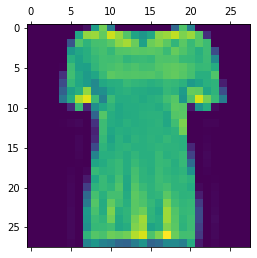

In [18]:
plt.matshow(x_train[10])

In [19]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [20]:
x_train_flattened.shape

(60000, 784)

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(784, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnn.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10, validation_split = 0.3)

Epoch 1/10
1313/1313 [==============================] - 59s 45ms/step - loss: 1.5893 - accuracy: 0.4348 - val_loss: 0.8816 - val_accuracy: 0.6699
Epoch 2/10
1313/1313 [==============================] - 51s 39ms/step - loss: 0.8053 - accuracy: 0.6949 - val_loss: 0.9869 - val_accuracy: 0.6502
Epoch 3/10
1313/1313 [==============================] - 48s 37ms/step - loss: 0.6773 - accuracy: 0.7472 - val_loss: 0.7040 - val_accuracy: 0.7529
Epoch 4/10
1313/1313 [==============================] - 47s 35ms/step - loss: 0.6071 - accuracy: 0.7753 - val_loss: 0.5929 - val_accuracy: 0.7763
Epoch 5/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.5646 - accuracy: 0.7904 - val_loss: 0.5371 - val_accuracy: 0.8009
Epoch 6/10
1313/1313 [==============================] - 48s 37ms/step - loss: 0.5330 - accuracy: 0.8033 - val_loss: 0.5681 - val_accuracy: 0.7888
Epoch 7/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.5070 - accuracy: 0.8126 - val_loss: 0.5224 -

In [25]:
y_pred=cnn.predict(x_test)

In [27]:
print(np.argmax(y_pred[4334]))
print(x_test.shape)

9
(10000, 28, 28)


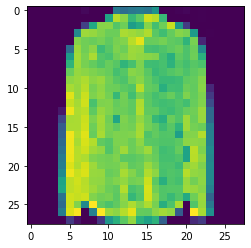

In [30]:
plt.imshow(np.squeeze(x_test[44]))

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

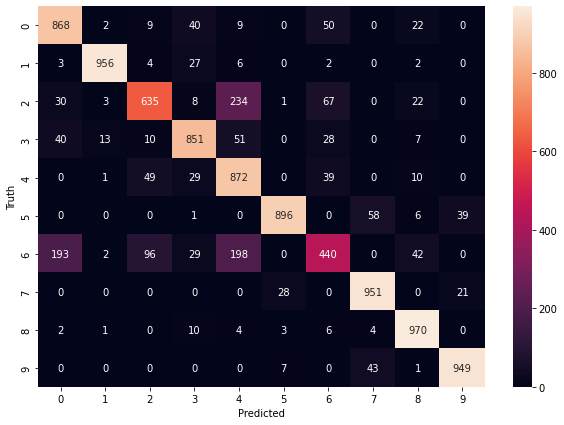

In [33]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')